# Priors


## Quelques aspects techniques avant de commencer

Il est très important de faire tourner la section ci-dessous, même si d'un point de vue pratique elle ne fait que préparer les instruments dont nous allons nous servir plus tard dans le document.


In [6]:
# Installation des packages, à faire une seule fois
# install.packages("ggplot2")
# install.packages("HDInterval")

# Chargement des packages
library(ggplot2)
library(HDInterval)

Une idée centrale en statistiques bayésiennes est que l'on peut exprimer ce que l'on sait (ou ce que l'on croit savoir) à propos d'un paramètre avant d'observer les données. Cette information préalable est appelée un prior, ou information a priori. 

Formellement, on exprime nos connaissance a priori à travers une distribution de probabilité qui représente notre connaissance ou nos croyances sur les valeurs possibles du paramètre avant d'avoir vu les données.

Nous pouvons nous référer à notre exemple du traitement pour des troubles d'addiction aux substance. Dans cet exemple, 10 personnes ont suivi le traitement, et nous mesurons le nombre de personnes qui ont eu au moins une rechute dans les 6 mois.

Nous cherchons à exprimer les connaissances que vous avons sur le paramètre de probabilité de rechute $\theta$ avant de recolter les données.

## La loi bêta

La loi bêta est utilisée pour definir les priors de paramètres variant entre 0 et 1, comme c'est le cas pour notre paramètre de rechute $\theta$. La distribution de la loi bêta est définie comme suit :

$$
f(\theta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} \, \theta^{\alpha - 1} (1 - \theta)^{\beta - 1}
$$

Et peut varier en fonction de deux paramètres de forme :
* $\alpha$ : premier paramètre de forme
* $\beta$ : deuxième paramètre de forme

Ces deux paramètres de forme peuvent faire varier considérablement la forme de la courbe de cette distribution. Selon les valeurs de ces paramètres, la distribution peut prendre une grande variété de formes : uniforme, en cloche, en U ou fortement asymétrique. Cette flexibilité et cette capacité à représenter une gamme variée de croyances rendent la distribution bêta très puissante.

Dans la cas présent, nous sommes en train de déterminer la distribution de probabilité d'un paramètre $\theta$ que nous cherchons à estimer. Lorsqu'il s'agit de déterminer les paramètres de la distribution de probabilité d'un paramètre, comme dans le cas d'un prior, on parle d'hyperparamètre. Les paramètres d'une distribution a priori sont donc des hyperparamètres. Autrement dit, lorsqu’on choisit une loi de probabilité (comme une loi bêta) pour exprimer nos croyances initiales sur un paramètre inconnu (comme $\theta$) avant d’avoir observé les données, cette loi contient elle-même des paramètres ($\alpha$, $\beta$), appelés hyperparamètres.

### Distribution uniforme

Si l'on définit $\beta = \alpha = 1$, on obtient une distribution uniforme. Dans ce cas, toutes les valeurs du paramètre $\theta$, qui représente l'hypothèse que l'on cherche à estimer, ont la même probabilité. 

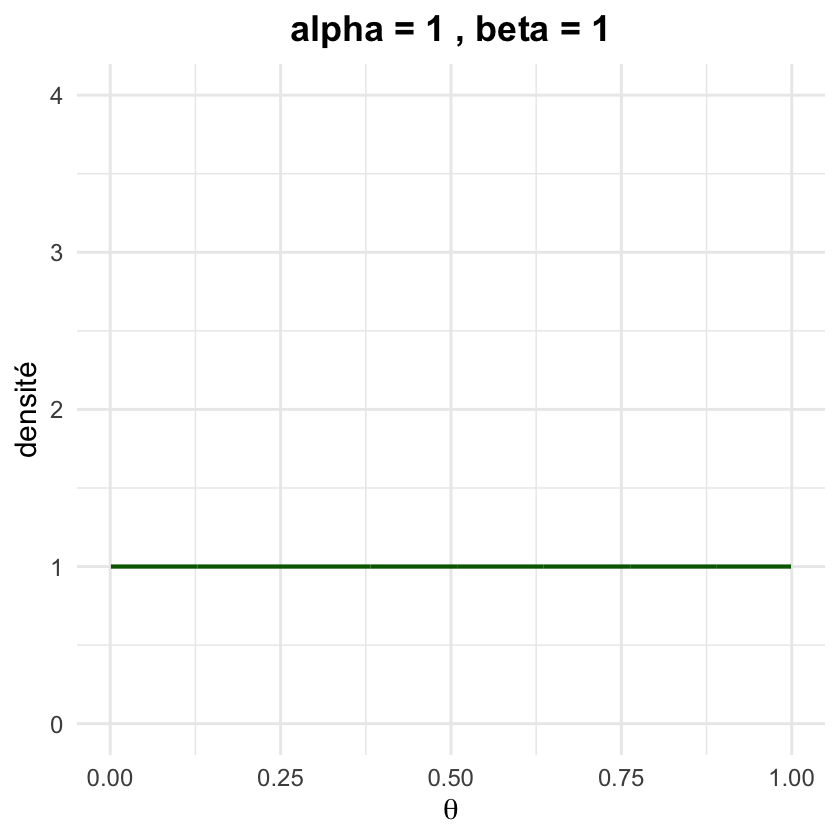

In [7]:
# Définir les hyperparamètres
alpha <- 1
beta <- 1

# Création des données
x <- seq(0.001, 0.999, by = 0.001)
y <- dbeta(x, shape1 = alpha, shape2 = beta)

# Graphique
ggplot(data.frame(x, y), aes(x, y)) +
  geom_line(color = "darkgreen", linewidth = 1.2) +
  ggtitle(paste("alpha =", alpha, ", beta =", beta)) +
  xlab(expression(theta)) +
  ylab("densité") +
  ylim(0, 4) +
  theme_minimal(base_size = 18) +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))

### Distribution linéaire croissante ou décroissante

Si l'on definit $\alpha = 1$ et $\beta =2$, nous avons une relation linéaire déterminant que plus les valeurs sont faibles, plus elles sont probables.

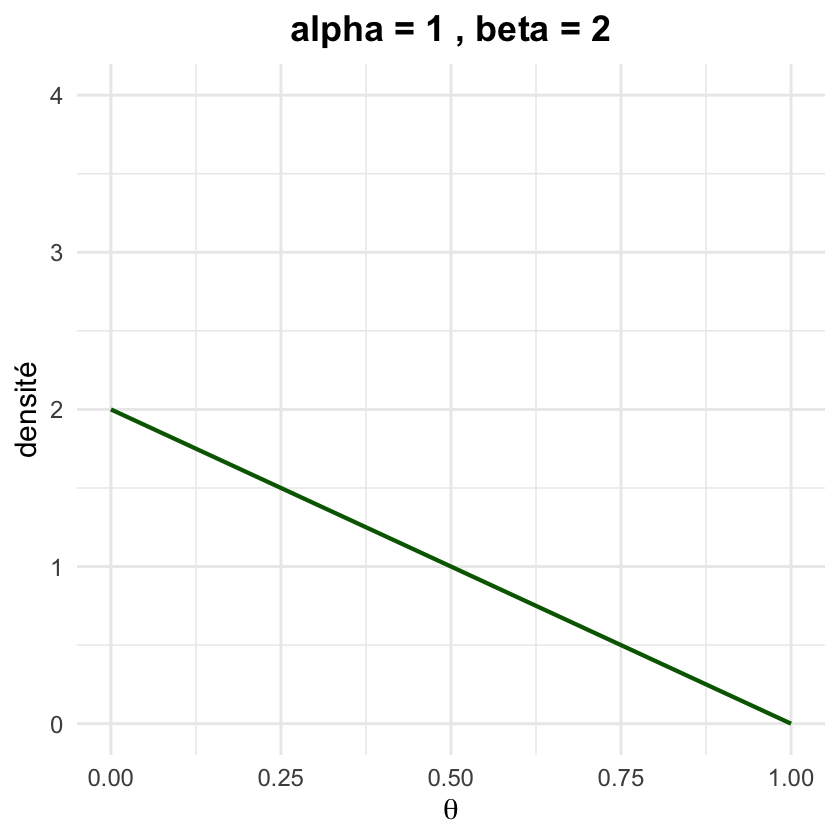

In [8]:
# Définir les hyperparamètres
alpha <- 1
beta <- 2

# Créer les données
x <- seq(0, 1, by = 0.01)
y <- dbeta(x, shape1 = alpha, shape2 = beta)

# Graphique
ggplot(data.frame(x, y), aes(x, y)) +
  geom_line(color = "darkgreen", linewidth = 1.2) +
  ggtitle(paste("alpha =", alpha, ", beta =", beta)) +
  xlab(expression(theta)) +
  ylab("densité") +
  ylim(0, 4) +
  theme_minimal(base_size = 18) +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))

Si l'on définit $\alpha = 2$ et $\beta =1$, nous avons une relation linéaire déterminant que plus les valeurs sont élevées, plus elles sont probables.

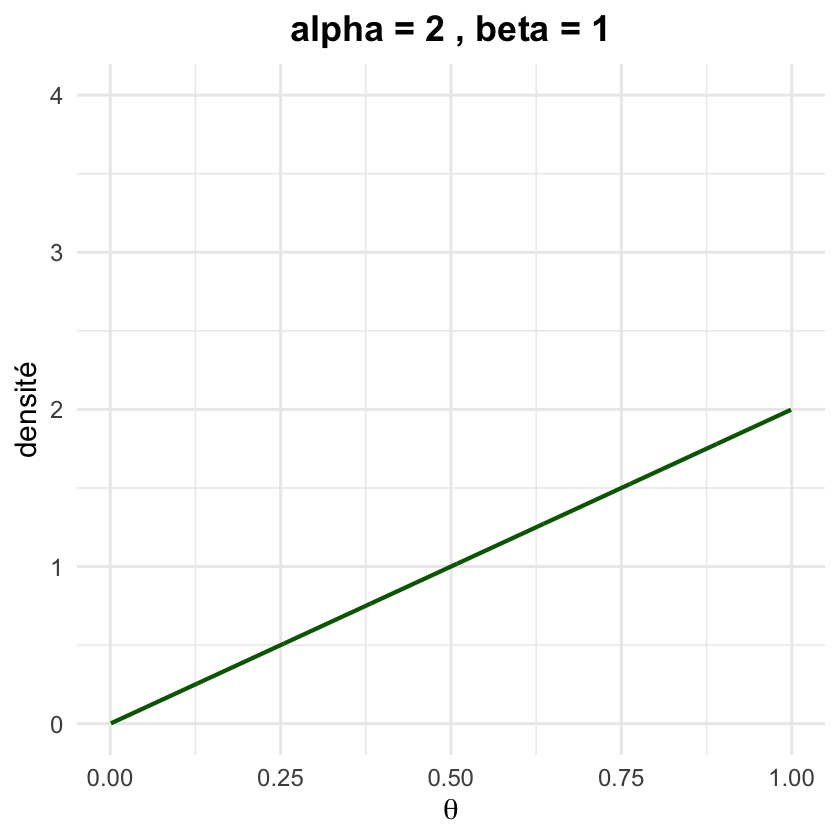

In [9]:
# Définir les hyperparamètres
alpha <- 2
beta <- 1

# Créer les données
x <- seq(0.001, 0.999, by = 0.001)
y <- dbeta(x, shape1 = alpha, shape2 = beta)

# Graphique
ggplot(data.frame(x, y), aes(x, y)) +
  geom_line(color = "darkgreen", linewidth = 1.2) +
  ggtitle(paste("alpha =", alpha, ", beta =", beta)) +
  xlab(expression(theta)) +
  ylab("densité") +
  ylim(0, 4) +
  theme_minimal(base_size = 18) +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))

### Distribution en cloche



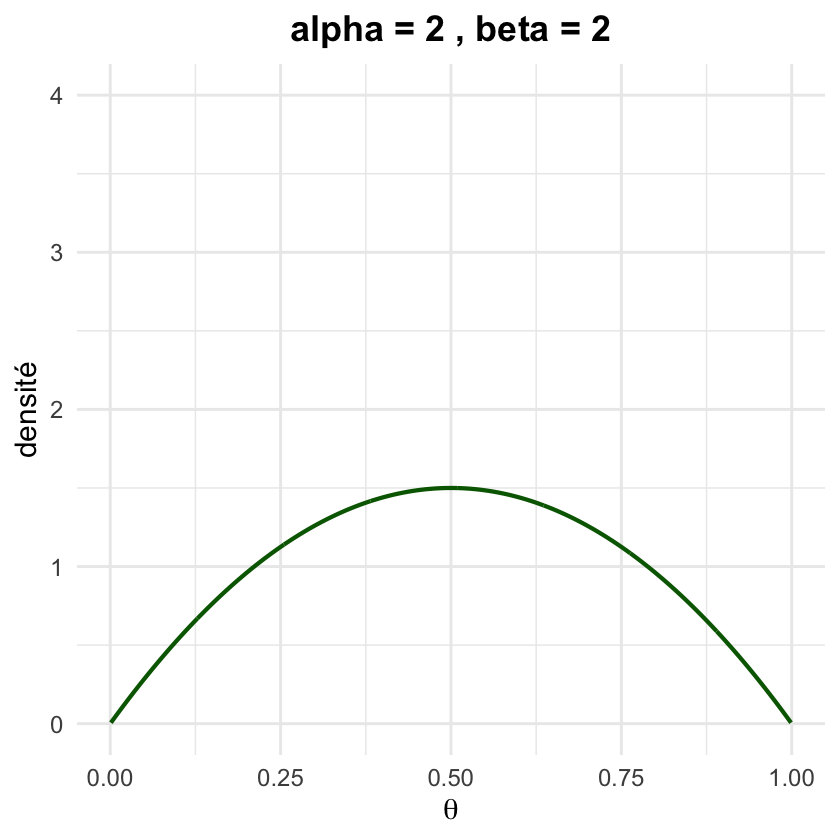

In [26]:
# Définir les hyperparamètres
alpha <- 2
beta <- 2

# Créer les données
x <- seq(0.001, 0.999, by = 0.001)
y <- dbeta(x, shape1 = alpha, shape2 = beta)

# Graphique
ggplot(data.frame(x, y), aes(x, y)) +
  geom_line(color = "darkgreen", linewidth = 1.2) +
  ggtitle(paste("alpha =", alpha, ", beta =", beta)) +
  xlab(expression(theta)) +
  ylab("densité") +
  ylim(0, 4) +
  theme_minimal(base_size = 18) +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))

Nous pouvons changer la forme de la cloche en augmentant la valeur des paramètres.

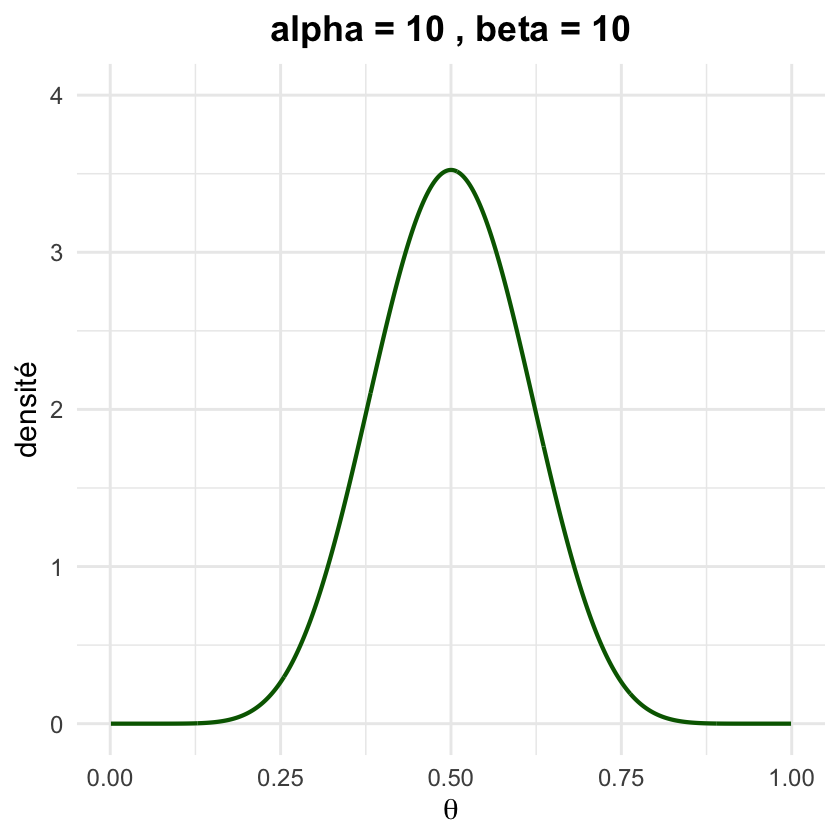

In [20]:
# Définir les hyperparamètres
alpha <- 10
beta <- 10

# Créer les données
x <- seq(0.001, 0.999, by = 0.001)
y <- dbeta(x, shape1 = alpha, shape2 = beta)

# Graphique
ggplot(data.frame(x, y), aes(x, y)) +
  geom_line(color = "darkgreen", linewidth = 1.2) +
  ggtitle(paste("alpha =", alpha, ", beta =", beta)) +
  xlab(expression(theta)) +
  ylab("densité") +
  ylim(0, 4) +
  theme_minimal(base_size = 18) +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))

### Distribution asymétrique

En utilisant des valeurs de beta et alpha différentes, il est aussi possible d'obtenir des distributions asymétriques.

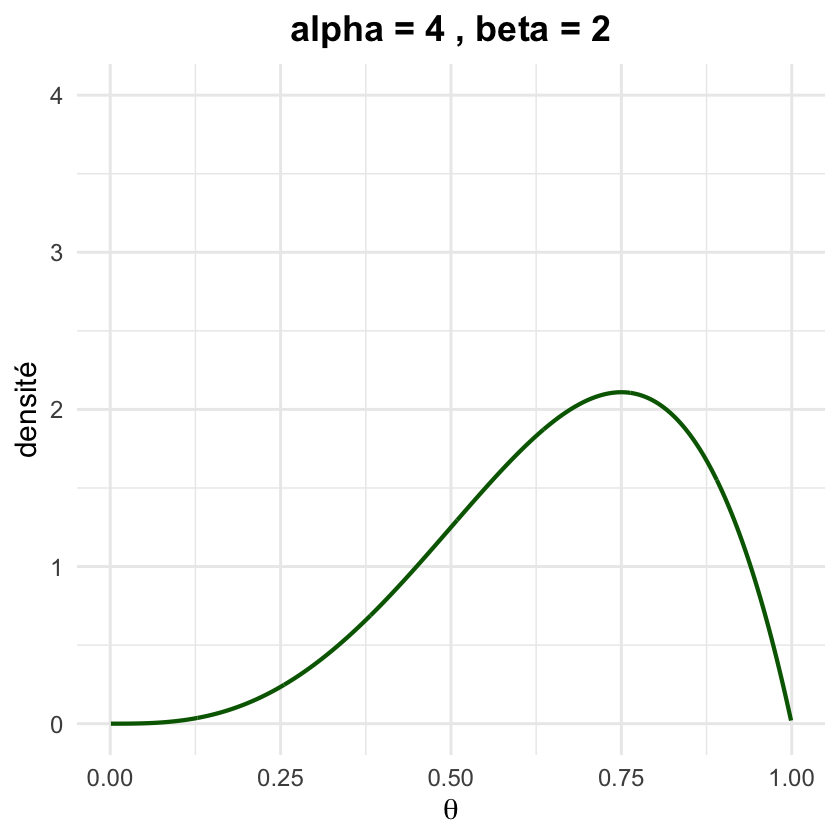

In [31]:
# Définir les hyperparamètres
alpha <- 4
beta  <- 2

# Créer les données
x <- seq(0.001, 0.999, by = 0.001)
y <- dbeta(x, shape1 = alpha, shape2 = beta)

# Graphique
ggplot(data.frame(x, y), aes(x, y)) +
  geom_line(color = "darkgreen", linewidth = 1.2) +
  ggtitle(paste("alpha =", alpha, ", beta =", beta)) +
  xlab(expression(theta)) +
  ylab("densité") +
  ylim(0, 4) +
  theme_minimal(base_size = 18) +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))

### Distribution en U

Nous pouvons même obtenir une distribution en U ; dans ce cas, les paramètres aux extrêmes sont les plus probables. Pour obtenir une distribution en U, les paramètres de forme doivent avoir la même valeur et être inférieurs à 1.

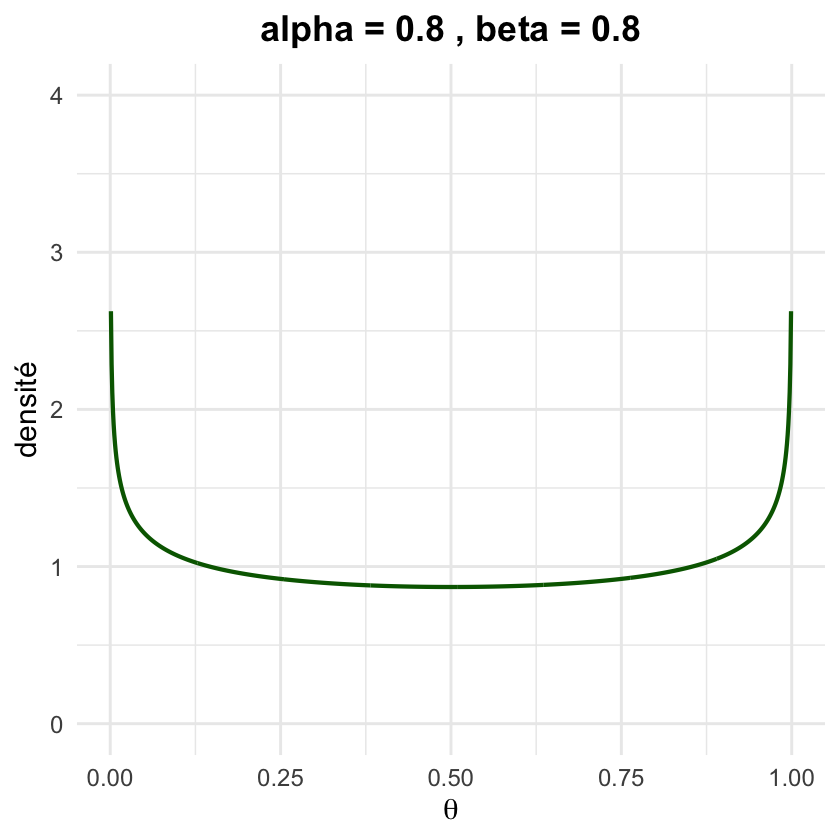

In [30]:
# Définir les hyperparamètres
alpha <- 0.8
beta <- 0.8

# Créer les données
x <- seq(0.001, 0.999, by = 0.001)
y <- dbeta(x, shape1 = alpha, shape2 = beta)

# Graphique
ggplot(data.frame(x, y), aes(x, y)) +
  geom_line(color = "darkgreen", linewidth = 1.2) +
  ggtitle(paste("alpha =", alpha, ", beta =", beta)) +
  xlab(expression(theta)) +
  ylab("densité") +
  ylim(0, 4) +
  theme_minimal(base_size = 18) +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))

## Incorporer les informations a priori dans l'estimation des paramètres

Dans notre exemple, nous pouvons facilement conjuguer la vraisemblance avec le prior parce que nous avons un modèle très simple. Nous pouvons formaliser notre modèle comme suit :

- $x \sim \mathrm{Binomial}(n, \theta) \quad \text{[vraisemblance]}$

- $\theta \sim \mathrm{Beta}(2, 2) \quad \text{[prior pour } \theta \text{]}$


En ce qui concerne les données observées, nous avons :


- $n = 10 \quad \text{[taille de l'échantillon]}$

- $k = 3 \quad \text{[rechute à 6 mois]}$


Comme dans la loi bêta nous connaissons la formule exacte de la constante de normalisation, nous pouvons l'ignorer pour le début :

$$ P(\theta \mid x) \propto P(x \mid \theta) \cdot P(\theta) $$


Ensuite, nous allons simplement rentrer le modèle de la binomiale dans la vraisemblance ($P(x \mid \theta)$) et le modèle de la loi bêta dans le prior ($P(\theta)$) comme suit :

$$ P(\theta \mid x) \propto \binom{n}{k} \theta^k (1 - \theta)^{n - k} \cdot \theta^{\alpha - 1} (1 - \theta)^{\beta - 1}$$

On obtient donc :

$$ P(\theta \mid x) \propto  \theta^{(\alpha + k)  - 1} (1 - \theta)^{(\beta+n-k) - 1}$$

En ajoutant la constante de normalisation, nous obtenons la distribution a posteriori du paramètre $\theta$ comme suit :

$$ \theta \sim \text{Beta}(\alpha + k, \beta + n - k) $$

Nous pouvons appliquer cette formule à nos données et à notre prior pour obtenir la distribution a posteriori comme suit :

$$ \theta \sim \text{Beta}(2 + 3, 2 + 10 - 3) $$

$$ \theta \sim \text{Beta}(5, 9) $$

Et nous pouvons l'implémenter :

In [15]:
# Définir les hyperparamètres
alpha <- 5
beta <- 9

# Créer les données
x <- seq(0.0001, 0.9999, by = 0.0001)
y <- dbeta(x, alpha, beta)

Une fois que nous avons la distribution, nous pouvons calculer la valeur médiane :

In [16]:
samples <- rbeta(10000, alpha, beta)
median_simulated <- median(samples)
print(median_simulated)

[1] 0.3497244


Ainsi que le 95% HDI :

In [17]:
# Calculer le 95% HDI
samples <- rbeta(10000, alpha, beta)
hdi_bounds <- hdi(samples, credMass = 0.95)
print(hdi_bounds)

    lower     upper 
0.1243885 0.5922602 
attr(,"credMass")
[1] 0.95


Nous pouvons visualiser les résultats :

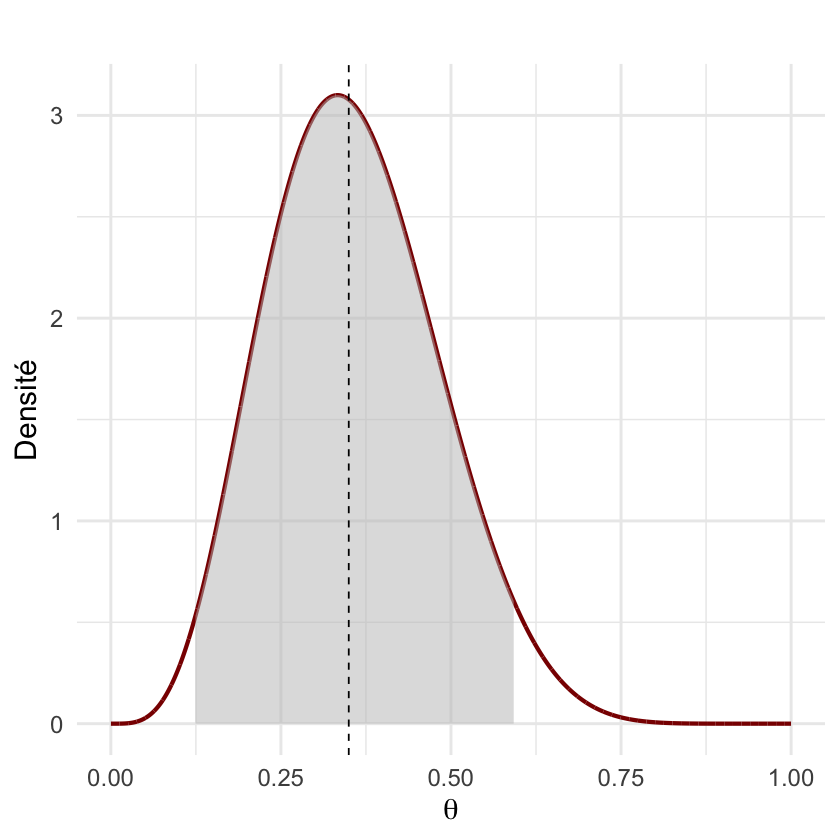

In [18]:
# Données
df <- data.frame(x = x, y = y)

# Graphique
ggplot(df, aes(x = x, y = y)) +
  geom_line(color = "darkred", linewidth = 1.2) +
  geom_area(data = subset(df, x >= hdi_bounds[1] & x <= hdi_bounds[2]),
            aes(x = x, y = y), fill = "gray", alpha = 0.5) +
  geom_vline(xintercept = median_simulated, linetype = "dashed", color = "black") +
  labs(title = "",
       x = expression(theta),
       y = "Densité") +
  theme_minimal(base_size = 18)

## Tester l'impact des priors et des données sur l'estimation de la distribution a posteriori

Nous pouvons essayer de tester l'impact des priors et des données sur l'estimation de la distribution a posteriori.

Dans notre exemple, 10 personnes ont suivi le traitement et nous avons mesuré le taux de rechute à 6 mois, constatant que 3 personnes sur 10 avaient eu une rechute. Dans le cours sur la vraisemblance, nous avons utilisé différentes méthodes pour estimer la valeur du taux de rechute ($\theta$) du traitement qui s’ajuste le mieux aux données que l'on observe. Nous avons vu que la valeur du paramètre $\theta$ qui maximise la vraisemblance des données était de $0.3$.

En utilisant cet exemple, nous pouvons tester l’impact de différents priors sur l’estimation de la distribution a posteriori de $\theta$.

Nous pouvons aussi tester l’impact des données : nous pouvons par exemple tester la différence entre un échantillon de 100 personnes avec 30 rechutes ou 1000 personnes et 300 rechutes, et voir quel est l’impact des priors selon la quantité de données.

Pour ce faire, nous pouvons modifier dans le code ci-dessous les paramètres de la distribution a priori (`alpha_pr` et `beta_pr`) ainsi que la taille de l’échantillon (`n`) et le nombre de rechutes (`k`).

In [34]:
# Hyperparamètres de la distribution a priori
alpha_pr <- 2
beta_pr <- 2

# Données
k <- 30
n <- 100

# Hyperparamètres de la distribution a posteriori
alpha <- alpha_pr + k
beta <- beta_pr + n - k

print(alpha)
print(beta)

[1] 32
[1] 72


In [35]:
samples <- rbeta(10000, alpha, beta)
median_simulated <- median(samples)
print(median_simulated)

[1] 0.3068832


In [29]:
samples <- rbeta(10000, alpha, beta)
hdi_bounds <- hdi(samples, credMass = 0.95)
print(hdi_bounds)

    lower     upper 
0.2246049 0.4011857 
attr(,"credMass")
[1] 0.95


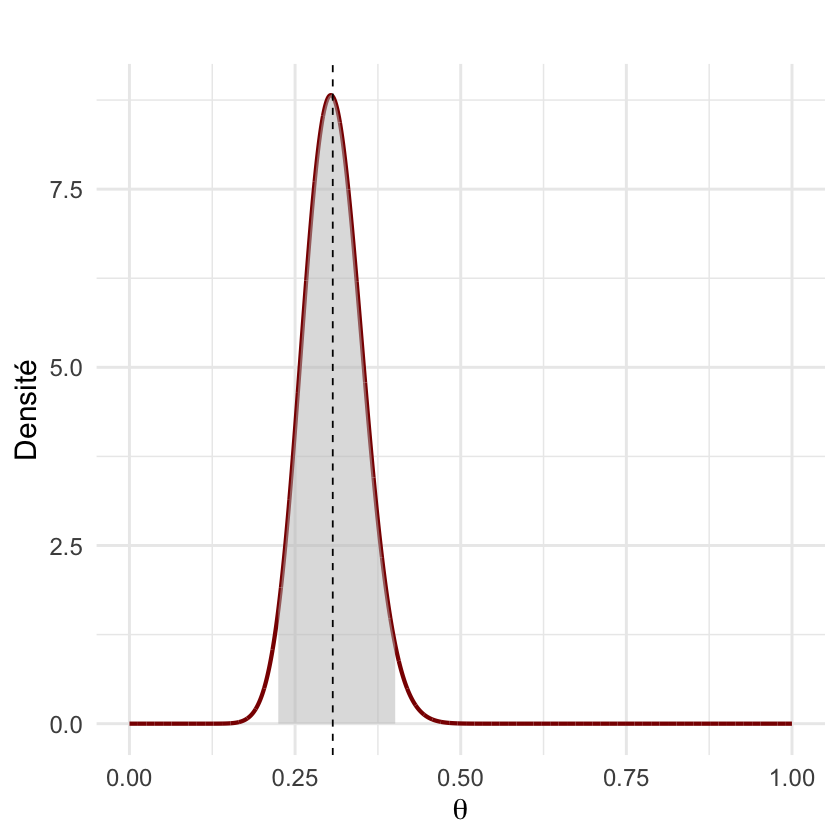

In [36]:
# Données
x <- seq(0.0001, 0.9999, by = 0.0001)
y <- dbeta(x, alpha, beta)
df <- data.frame(x = x, y = y)

# Graphique
ggplot(df, aes(x = x, y = y)) +
  geom_line(color = "darkred", linewidth = 1.2) +
  geom_area(data = subset(df, x >= hdi_bounds[1] & x <= hdi_bounds[2]),
            aes(x = x, y = y), fill = "gray", alpha = 0.5) +
  geom_vline(xintercept = median_simulated, linetype = "dashed", color = "black") +
  labs(title = "",
       x = expression(theta),
       y = "Densité") +
  theme_minimal(base_size = 18)

À travers les essais ci-dessus, nous pouvons observer que :

* De bonnes informations a priori peuvent réduire le degré d'incertitude de l'estimation a posteriori
  
* Les estimations bayésiennes et fréquentistes s’accordent toujours s’il y a suffisamment de données (tant que la vraisemblance n’est pas explicitement exclue par la loi a priori)